# Spatial Operations in Image Processing (Filtering & Sharpening)

Spatial operations use pixels in a neighborhood to determine the present pixel value. Applications include filtering and sharpening. They are used in many steps in computer vision like segmentation and are a key building block in Artificial Intelligence algorithms.

Table of Contents:
- [Linear Filtering](#Linear-Filtering)
- [Filtering Noise](#Filtering-Noise)  
- [Gaussian Blur](#Gaussian-Blur)  
- [Image Sharpening](#Image-Sharpening)  
- [Edges](#Edges)
- [Median](#Median)

## Linear Filtering

Filtering involves enhancing an image, for example removing the Noise from an image. Noise is caused by a bad camera or bad image compression. The same factors that cause noise may lead to blurry images, we can apply filters to sharpening these images. Convolution is a standard way to Filter an image the filter is called the kernel and different kernels perform different tasks. In addition, Convolution is used for many of the most advanced artificial intelligence algorithms. We simply take the dot product of the kernel and as an equally-sized portion of the image. 

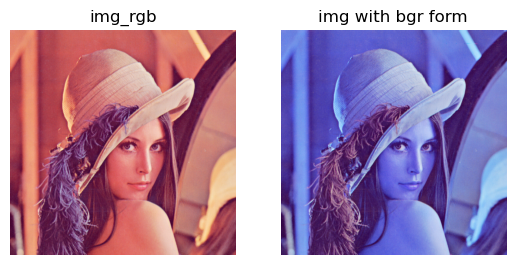

In [10]:
import cv2 as cv2
import matplotlib.pyplot as plt
img = cv2.imread("lenna.png")
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title('img_rgb')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img)
plt.title('img with bgr form')
plt.axis('off')

plt.show()

In [31]:
 # This function will plot two images
def plot_image(image_1, image_2,title_1,title_2):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.axis('off')

    plt.show()

## Filtering Noise

Smoothing filters average out the Pixels within a neighborhood, they are sometimes called low pass filters. For mean filtering, the  kernel simply averages out the kernels in a neighborhood.

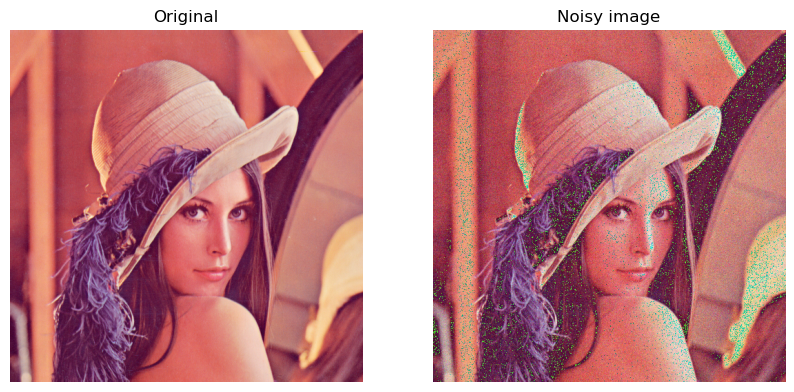

In [32]:
import numpy as np
rows, cols,_ =img_rgb.shape
# to create noise to the image with mean 0 and standerdiviation of 15
noise = np.random.normal(0, 15,(rows, cols, 3)).astype(np.uint8)
image_noise = img+noise
plot_image(img, image_noise, 'Original','Noisy image')

The function filter2D performs 2D convolution between the image src and the kernel on each color channel independently. The parameter ddepth has to do with the size of the output image, we will set it to -1 so the input and output are the same size.

In [28]:
kernel=np.ones((6,6))/36

In [29]:
image_filtered =cv2.filter2D(src=image_noise, ddepth= -1, kernel=kernel )

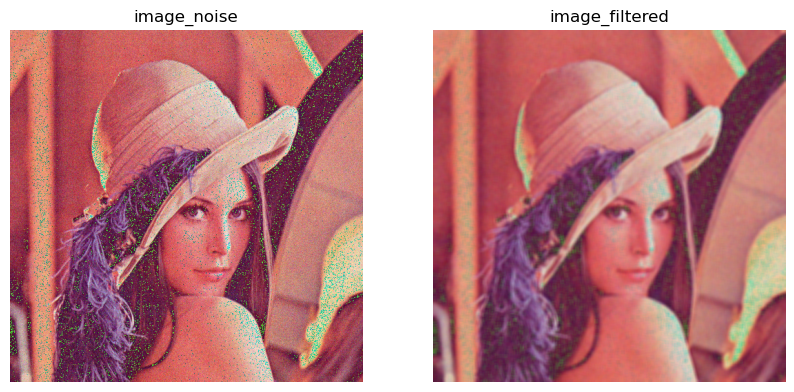

In [33]:
plot_image( image_noise,image_filtered,'image_noise','image_filtered')

## Guassion Blur:
The function  <code>GaussianBlur</code> convolves the source image with the specified Gaussian kernel It filters noise but does a better job of preserving the edges. It has the following parameters:


Parameters

<p><code>src</code> input image; the image can have any number of channels, which are processed independently</p>
<p><code>ksize:</code> Gaussian kernel size</p>
<p><code>sigmaX</code> Gaussian kernel standard deviation in the X direction</p>
<p><code>sigmaY</code> Gaussian kernel standard deviation in the Y direction; if sigmaY is zero, it is set to be equal to sigmaX </p>


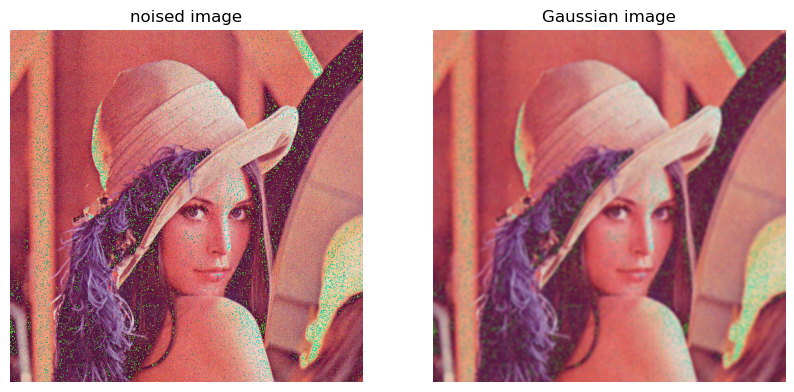

In [45]:
# caussian = (1/(2pay*alpha)*e^-((x2 +y2)/2alpha))
gaussian_image = cv2.GaussianBlur(image_noise,(5,5), sigmaX=6, sigmaY=6)
plot_image(image_noise, gaussian_image, 'noised image','Gaussian image')

## Image Sharpining:

Image Sharpening  involves smoothing the image and calculating the derivatives.  We can accomplish image sharpening by applying the following Kernel.

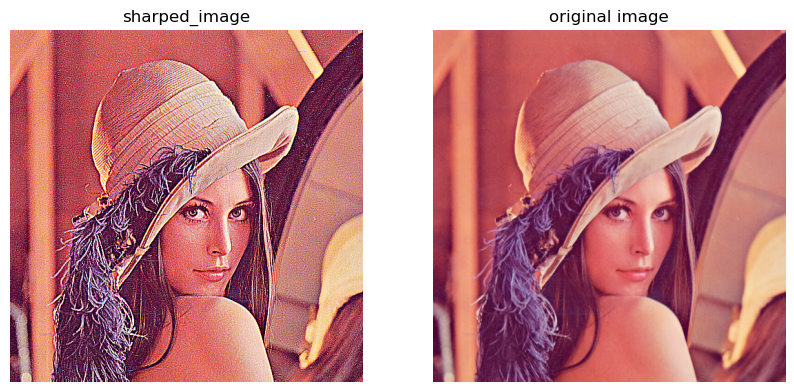

In [76]:
kernal=np.array([[-1, -1, -1], 
                 [-1, 9, -1],
                 [-1,-1, -1 ]])
sharped_image =cv2.filter2D(img, -1, kernal)
plot_image(sharped_image, img, 'sharped_image', 'original image' )

## Edge Detection:

Edges are where pixel intensities change. The Gradient of a function outputs the rate of change; we can approximate the gradient of a grayscale image with convolution. There are several methods to approximate the gradient, let’s use the Sobel edge detector. This combines several convolutions and finding the magnitude of the result.

In [101]:
# aproxmation os the graduant of the X and Y 
ddepth=cv2.CV_16S
channels =cv2.split(img)
sobal_X_channels = []
# apply sobal in Xdirection for each channel
for ch in channels:
    grad_x = cv2.Sobel(ch, ddepth, dx=1, dy=0, ksize=3)
    abs_grad_x =cv2.convertScaleAbs(grad_x)
    sobal_X_channels.append(abs_grad_x)
#  Merage channels to form an RGB sobal image
sobal_x_rgb = cv2.merge(sobal_X_channels)

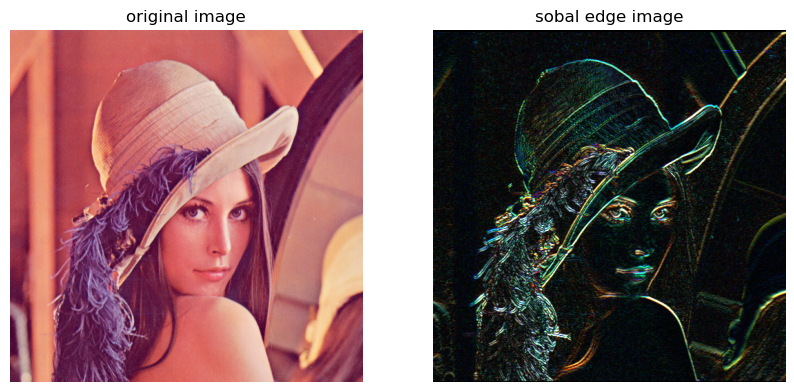

In [96]:
plot_image(img, sobal_x_rgb, 'original image', 'sobal edge image')

#### We can approximate the derivative in the X or Y direction  using the <code>Sobel</code> function, here are the parameters:

<p><code>src</code>: input image</p>
<p><code>ddepth</code>: output image depth, see combinations; in the case of 8-bit input images it will result in truncated derivatives</p>
<p><code>dx</code>: order of the derivative x</p>
<p><code>dx</code>: order of the derivative y</p>
<p><code>ksize</code> size of the extended Sobel kernel; it must be 1, 3, 5, or 7</p>

dx = 1 represents the derivative in the x-direction.  The function approximates  the derivative by  convolving   the image with the following kernel  

\begin{bmatrix} 
1 & 0 & -1 \\\\\\\\
2 & 0 & -2 \\\\
1 & 0 & -1 
\end{bmatrix}


## Median:

Median filters find the median of all the pixels under the kernel area and the central element is replaced with this median value. 


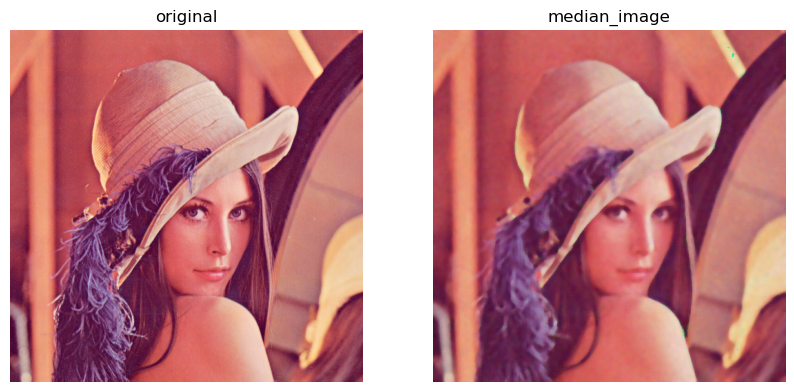

In [120]:
median_image =cv2.medianBlur(image_noise, 7)
plot_image(img, median_image ,'original', 'median_image' )